# DS 3000 HW 3 $\color{red}{\text{SOLUTIONS}}$

Due: Tueday Oct 11 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to Gradescope ([1:35 Section](https://www.gradescope.com/courses/431947) [3:25 Section](https://www.gradescope.com/courses/431864)) (this can also be done via the assignment on Canvas).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope.

### Tips for success
- Start early
- Make use of Piazza ([1:35 Section](https://piazza.com/class/l7dkfe3cgz21ul) [3:25 Section](https://piazza.com/class/l7dkey4g6m71e5)) (also accessable through Canvas)
- Make use of [Office Hours](https://docs.google.com/spreadsheets/d/1SMacPh9lhRvjHI1VCJfBbNGSga3RTYKzSsfRWEWqWQI/edit?usp=sharing)
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
    - Remember that documentation/style is important (See the Style Guide on Canvas!)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

# Part 1: Plotting Warm Up (18 points)

Plot each of the functions below over 100 evenly spaced points in the domain $[0, 10]$ on the *same* graph. 

Be sure to use the line specifications given below:

| Name       | Value                       | Color | Line Width     | Style  |
|------------|-----------------------------|-------|----------------|--------|
| sinusoid   | 3 * sin (2/3 x)             | Red   | 4              | dotted |
| polynomial | (x-3) (x - 2) (x-8) / 10    | Blue  | 2              | solid  |
| abs value  | min(abs(x - 3), abs(x - 8)) | Green | 3              | dashed |

- add a legend which specifies the name of each function
- use seaborn's `sns.set()` before plotting to make the graph look nice
- Make sure that the axes are labeled `x` and `f(x)`
- You may find the arithmetic functions needed in numpy (sin, abs, minimum)

$\color{red}{\text{Solution:}}$

In [1]:
# calling modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# make the font a bit bigger
sns.set(font_scale = 1.2)

# create the variables
x = np.linspace(0, 10, 100)
sinusoid_y = 3 * np.sin(2/3 * x)
polynom_y = (x - 3) * (x - 2) * (x - 8) / 10
absval_y = np.minimum(abs(x - 3), abs(x - 8))

Text(0, 0.5, 'f(x)')

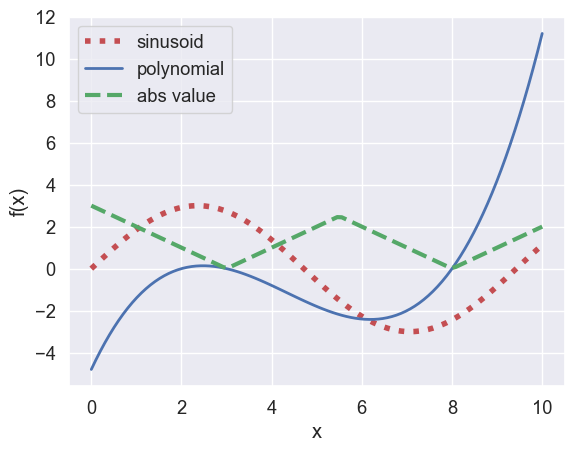

In [2]:
# create the plots in the same graph
plt.plot(x, sinusoid_y, color = 'r', linewidth = 4, linestyle = ':', label = 'sinusoid')
plt.plot(x, polynom_y, color = 'b', linewidth = 2, linestyle = '-', label = 'polynomial')
plt.plot(x, absval_y, color = 'g', linewidth = 3, linestyle = '--', label = 'abs value')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')

# Part 2: FIFA Players (22 points)

Create a plotly scatter plot which shows the mean `Overall` rating for all soccer players (rows) of a particular `Age`. Color your scatter plot per `Nationality` of the player, focusing on three countries (`England`, `Germany`, `Spain`). Download the `players_fifa23.csv` from Canvas and make sure it is in the same directory as this notebook file.

Export your graph as an html file `age_ratings_nationality.html` and submit it with your completed homework `ipynb` to gradescope.

Hints:
- There may be multiple ways/approaches to accomplish this task.
- One approach: you may use `groupby()` and boolean indexing to build these values in a loop which runs per each `Nationality`.
- `px.scatter()` will only graph data from columns (not the index).  Some approaches may need to graph data from the index.  You can use [df.reset_index()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) to make your index a new column as shown [in this example](https://colab.research.google.com/drive/1d9JDphmpSTg9NtFMyfFnMQ6RmIx6zChK?usp=sharing)
- In some approaches you may need to pass multiple rows to [df.append()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html) if need be as shown [in this example](https://colab.research.google.com/drive/1XbBHMcYq_2Q225nkKs3j06iigCQGmM4H?usp=sharing)
- In some approaches you may need to go from "wide" data to "long" data by using [df.melt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) as discussed [here](https://towardsdatascience.com/reshaping-a-pandas-dataframe-long-to-wide-and-vice-versa-517c7f0995ad)
- The first few code cells below get you started with looking at the data set.

$\color{red}{\text{Solution:}}$

In [2]:
# this will come in handy later, and needs to be called before import pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# use pandas to read in the data
import pandas as pd

df_fifa = pd.read_csv('players_fifa23.csv', index_col = 'ID')
df_fifa.head()

,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,Growth,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
ID,,,,,,,,,,,,,,,,,,,,,
165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,0,...,89,84,89,67,67,67,63,58,63,21
158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,0,...,91,88,91,67,66,67,62,53,62,22
231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,4,...,92,84,92,70,66,70,66,57,66,21
192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,0,...,91,91,91,82,82,82,78,72,78,24
188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,0,...,86,83,86,67,69,67,64,63,64,22


In [3]:
df_fifa.Nationality.value_counts()

England        1652
Germany        1209
Spain          1054
France          936
Argentina       930
               ... 
Saint Lucia       1
Kazakhstan        1
Vietnam           1
Niger             1
Singapore         1
Name: Nationality, Length: 161, dtype: int64

In [4]:
df_fifa.shape

(18360, 89)

In [5]:
df_fifa['Age'].unique()

array([34, 35, 23, 31, 33, 30, 36, 37, 28, 29, 27, 25, 32, 21, 26, 24, 19,
       22, 40, 20, 39, 38, 44, 17, 41, 18, 42, 43, 16], dtype=int64)

In [17]:
nations = ['England', 'Germany', 'Spain']
empty = pd.DataFrame()

unique_age = df_fifa['Age'].unique()
dct = {}
for a in unique_age:
    for nat in nations:
        bool = (df_fifa['Nationality'] == nat) & (df_fifa['Age'] == a)
        new_df_fifa = df_fifa.loc[bool,:]
        dct['Avg'] = new_df_fifa['Overall'].mean()
        dct['Nationality'] = nat
        dct['Age'] = a
        empty = empty.append(pd.Series(dct), ignore_index = True)
        
empty

,Avg,Nationality,Age
0,66.454545,England,34
1,71.000000,Germany,34
2,74.312500,Spain,34
3,66.500000,England,35
4,69.000000,Germany,35
...,...,...,...
82,NaN,Germany,43
83,NaN,Spain,43
84,NaN,England,16
85,55.333333,Germany,16


In [14]:
(df_fifa['Nationality'] == 'England') & (df_fifa['Age'] == 17)

ID
165153    False
158023    False
231747    False
192985    False
188545    False
          ...  
261899    False
271152    False
269578    False
269577    False
259649    False
Length: 18360, dtype: bool

In [7]:
# getting the data frame for plotting
nations = ['England', 'Germany', 'Spain']
ages = pd.DataFrame({'Age': sorted(df_fifa['Age'].unique())})
ages = ages.set_index('Age')

for nat in nations:
    df_fifa_nat = df_fifa[df_fifa['Nationality'] == nat]
    df_fifa_nat_age = df_fifa_nat.groupby('Age')
    rating_series = pd.Series(df_fifa_nat_age.Overall.mean())
    ages[nat] = rating_series
    
ages = ages.reset_index()
ages = pd.melt(ages, id_vars = ('Age'), value_vars = ('England', 'Germany', 'Spain'), value_name = 'Overall', var_name = 'Nationality')
ages

,Age,Nationality,Overall
0,16,England,NaN
1,17,England,53.941176
2,18,England,54.875000
3,19,England,57.852459
4,20,England,59.562044
...,...,...,...
82,40,Spain,78.666667
83,41,Spain,73.000000
84,42,Spain,NaN
85,43,Spain,NaN


In [8]:
# making the plot
import plotly.express as px

px.scatter(ages, x='Age', y='Overall', color='Nationality')

ModuleNotFoundError: No module named 'plotly'

In [9]:
# exporting as html
import plotly

savefig = px.scatter(ages, x='Age', y='Overall', color='Nationality')
plotly.offline.plot(savefig, filename='age_ratings_nationality.html');

ModuleNotFoundError: No module named 'plotly'

# Part 3: Daylight through the year

The remainder of the homework asks you to complete the pipeline which, given the lattitude / longitude and timezone of some cities:

``` python
loc_dict = {'Boston': (42.3601, -71.0589, 'US/Eastern'),
            'Lusaka': (-15.3875, 28.3228, 'Africa/Lusaka'),
            'Sydney': (-33.8688, 151.2093, 'Australia/Sydney')}
```

the keys are the `name` of the city and the values are tuples of `lat, lon, timezone_name

is able to:
- query a sunrise / sunset API
- clean and process data (timezone management & building `datetime` objects)
- For extra credit: produce the following graph of daylight through the year:

<img src="https://i.ibb.co/CBhWtCY/newdaylight.png" alt="newdaylight" style="width: 500px;"/>

## Part 3.1: Getting Sunrise Sunset via API (16 points)
Write the `get_sunrise_sunset()` function below so that it uses [this sunrise sunset API](https://sunrise-sunset.org/api) to produce produce the output shown in the test case below.

It may be helpful to know that this particular API...
- requires no api key
- returns about 2.5 queries per second
- did not block me when I tried to make 100 consecutive calls as quickly as possible

$\color{red}{\text{Solution:}}$

In [10]:
# you will need to run pip install requests in the terminal
# no need to install json, it is built into python
import requests
import json

# make sure to write a good docstring! I will do this for you for the other functions in this homework, but you should practice here!
def get_sunrise_sunset(lat, lng, date):
    """ fetches the sunrise sunset API information on a particular date for a given latitude-longitude
    
    Args:
        lat (float): latitude of interest
        lng (float): longitude of interest
        date (str): date of interest
        
    Returns:
        gss_dict (dictionary): a dictionary that contains the API information, as well as the arguments
    """   
    
    url = f'https://api.sunrise-sunset.org/json?lat={lat}&lng={lng}&date={date}'
    url_text = requests.get(url).text
    gss_dict = json.loads(url_text)
    gss_dict['lat-lng'] = (lat, lng)
    gss_dict['date'] = date
    
    return gss_dict

In [11]:
sun_dict = get_sunrise_sunset(lat=42.3601, lng=-71.0589, date='2022-02-15')
sun_dict_expected = \
{'results': {'sunrise': '11:38:48 AM',
            'sunset': '10:17:50 PM',
            'solar_noon': '4:58:19 PM',
            'day_length': '10:39:02',
            'civil_twilight_begin': '11:11:30 AM',
            'civil_twilight_end': '10:45:08 PM',
            'nautical_twilight_begin': '10:38:37 AM',
            'nautical_twilight_end': '11:18:00 PM',
            'astronomical_twilight_begin': '10:06:05 AM',
            'astronomical_twilight_end': '11:50:33 PM'},
 'status': 'OK',
 'lat-lng': (42.3601, -71.0589),
 'date': '2022-02-15'}

assert sun_dict == sun_dict_expected, 'get_sunrise_sunset() error'

## Part 3.2: (14 points)

It may appear the test case above is in error, but a look at the API's documentation reminds us: 

    "NOTE: All times are in UTC and summer time adjustments are not included in the returned data."
    
Complete the `change_tz()` below so that it passes the given test case. 

$\color{red}{\text{Solution:}}$

In [12]:
import pytz
from datetime import datetime

def change_tz(dt, timezone_from, timezone_to):
    """ converts timezone of a timezone naive datetime object
    
    Args:
        dt (datetime): datetime (or time) object without timezone
        timezone_from (str): timezone of input
        timezone_to (str): timezone of output datetime
        
    Returns:
        dt (datetime): datetime object corresponding to 
            unix_time
    """
    
    dt_from = pytz.timezone(timezone_from).localize(dt)
    dt = dt_from.astimezone(pytz.timezone(timezone_to))
    
    return dt

In [13]:
# build test case input / output
dt_no_tz = datetime(2021, 2, 13, 9, 54, 4, 270088)
dt_expect = datetime(2021, 2, 13, 14, 54, 4, 270088, tzinfo=pytz.timezone('GMT'))

# compute actual output
dt = change_tz(dt_no_tz, timezone_from='US/Eastern', timezone_to='GMT')

assert dt == dt_expect, 'change_tz() error'

In [14]:
# build test case input / output
dt_no_tz = datetime(2021, 2, 13, 9, 54, 4, 270088)
dt_expect = datetime(2021, 2, 13, 9, 54, 4, 270088, tzinfo=pytz.timezone('GMT'))

# compute actual output
dt = change_tz(dt_no_tz, timezone_from='GMT', timezone_to='GMT')

assert dt == dt_expect, 'change_tz() error'

## Part 3.3: (20 points)
Build `clean_sun_dict()` to pass each of the two test cases below.  Note that:
- sunrise and sunset are `time` objects which account for daylight's saving:
    - include the date when building these objects
    - use `change_tz()` above to cast them to the proper timezone
    - build `time` objects by calling `datetime.time()` to discard the date of a `datetime`
    - importing `pandas as pd` and using `pd.to_datetime` may also be helpful
- `sunrise_hr` and `sunset_hr` are the hours since the day began in local timezone (more easily graphed)
    - you may use `.strftime()` and `int()` to cast time objects to strings and then integers (which may be helpful) 
    
**NOTE:** There may be more than one way to accomplish writing this function; as long as the function passes both `assert` test cases, you may continue. Just do be sure to comment and present your code as cleanly as possible.

$\color{red}{\text{Solution:}}$

In [15]:
from datetime import datetime, time
import pandas as pd

def clean_sun_dict(sun_dict, timezone_to):
    """ builds pandas series and cleans output of API
    
    Args:
        sun_dict (dict): dict of json (see ex below)
        timezone_to (str): timezone of outputs (API returns
            UTC times)
            
    Returns:
        sun_series (pd.Series): all times converted to
            time objects
    
    example sun_series:
    
    date            2021-02-13 00:00:00
    lat-lng        (36.72016, -4.42034)
    sunrise                    02:11:06
    sunrise_hr                    2.185
    sunset                     13:00:34
    sunset_hr                   13.0094
    dtype: object
    """
    
    sunrise_old = pd.to_datetime(sun_dict['date'] + ' ' + sun_dict['results']['sunrise'])
    sunrise_new = change_tz(sunrise_old, 'UTC', timezone_to)
    sunrise = sunrise_new.time()
    sunrise_hr = int(sunrise.strftime("%H")) + int(sunrise.strftime("%M"))/60 + int(sunrise.strftime("%S"))/3600
    
    sunset_old = pd.to_datetime(sun_dict['date'] + ' ' + sun_dict['results']['sunset'])
    sunset_new = change_tz(sunset_old, 'UTC', timezone_to)
    sunset = sunset_new.time()
    sunset_hr = int(sunset.strftime("%H")) + int(sunset.strftime("%M"))/60 + int(sunset.strftime("%S"))/3600
    
    sun_series_dict = {'date': pd.to_datetime(sun_dict['date']),
                       'lat-lng': sun_dict['lat-lng'],
                       'sunrise': sunrise,
                       'sunrise_hr': sunrise_hr,
                       'sunset': sunset,
                       'sunset_hr': sunset_hr}
    
    return pd.Series(sun_series_dict)

In [16]:
sun_dict = {'results': {'sunrise': '11:38:48 AM',
                        'sunset': '10:17:50 PM',
                        'solar_noon': '4:58:19 PM',
                        'day_length': '10:39:02',
                        'civil_twilight_begin': '11:11:30 AM',
                        'civil_twilight_end': '10:45:08 PM',
                        'nautical_twilight_begin': '10:38:37 AM',
                        'nautical_twilight_end': '11:18:00 PM',
                        'astronomical_twilight_begin': '10:06:05 AM',
                        'astronomical_twilight_end': '11:50:33 PM'},
             'status': 'OK',
             'lat-lng': (42.3601, -71.0589),
             'date': '2022-02-15'}

# test without timezone conversion
sun_series = clean_sun_dict(sun_dict, timezone_to='GMT')

sun_series_exp = pd.Series(
{'date': datetime(year=2022, month=2, day=15),
'lat-lng': (42.3601, -71.0589),
'sunrise': time(hour=11, minute=38, second=48),
'sunrise_hr': 11.646666666666667,
'sunset': time(hour=22, minute=17, second=50),
'sunset_hr': 22.297222222222224})

assert sun_series.eq(sun_series_exp).all(), 'clean_sun_dict() error (GMT)'

In [17]:
# test with timezone conversion
sun_series = clean_sun_dict(sun_dict, timezone_to='US/Eastern',)

sun_series_exp = pd.Series(
{'date': datetime(year=2022, month=2, day=15),
'lat-lng': (42.3601, -71.0589),
'sunrise': time(hour=6, minute=38, second=48),
'sunrise_hr': 6.6466666666666665,
'sunset': time(hour=17, minute=17, second=50),
'sunset_hr': 17.297222222222224})

assert sun_series.eq(sun_series_exp).all(), 'clean_sun_dict() error (EST)'

## Part 3.4: (10 points)

Write the `get_annual_sun_data()` function so that it produces the outputs shown below.  This function should make use of:
 - `get_sunrise_sunset()`
 - `clean_sun_dict()`
   
as built above.

The following snippet:

```python
loc_dict = {'Boston': (42.3601, -71.0589, 'US/Eastern'),
            'Lusaka': (-15.3875, 28.3228, 'Africa/Lusaka'),
            'Sydney': (-33.8688, 151.2093, 'Australia/Sydney')}
df_annual_sun = get_annual_sun_data(loc_dict, year=2021, period_day=30)
df_annual_sun.head(15)
```

should generate:

|    |   city |       date |              lat-lng |  sunrise | sunrise_hr |   sunset | sunset_hr |
|---:|-------:|-----------:|---------------------:|---------:|-----------:|---------:|----------:|
|  0 | Boston | 2021-01-01 |  (42.3601, -71.0589) | 07:11:49 |   7.196944 | 16:24:12 | 16.403333 |
|  1 | Lusaka | 2021-01-01 |  (-15.3875, 28.3228) | 05:38:33 |   5.642500 | 18:42:09 | 18.702500 |
|  2 | Sydney | 2021-01-01 | (-33.8688, 151.2093) | 05:46:24 |   5.773333 | 20:10:53 | 20.181389 |
|  3 | Boston | 2021-01-31 |  (42.3601, -71.0589) | 06:56:43 |   6.945278 | 16:58:42 | 16.978333 |
|  4 | Lusaka | 2021-01-31 |  (-15.3875, 28.3228) | 05:55:43 |   5.928611 | 18:44:35 | 18.743056 |
|  5 | Sydney | 2021-01-31 | (-33.8688, 151.2093) | 06:14:24 |   6.240000 | 20:02:42 | 20.045000 |
|  6 | Boston | 2021-03-02 |  (42.3601, -71.0589) | 06:15:41 |   6.261389 | 17:36:50 | 17.613889 |
|  7 | Lusaka | 2021-03-02 |  (-15.3875, 28.3228) | 06:06:23 |   6.106389 | 18:31:11 | 18.519722 |
|  8 | Sydney | 2021-03-02 | (-33.8688, 151.2093) | 06:42:34 |   6.709444 | 19:32:04 | 19.534444 |
|  9 | Boston | 2021-04-01 |  (42.3601, -71.0589) | 06:24:21 |   6.405833 | 19:11:35 | 19.193056 |
| 10 | Lusaka | 2021-04-01 |  (-15.3875, 28.3228) | 06:11:08 |   6.185556 | 18:09:54 | 18.165000 |
| 11 | Sydney | 2021-04-01 | (-33.8688, 151.2093) | 07:06:04 |   7.101111 | 18:52:05 | 18.868056 |
| 12 | Boston | 2021-05-01 |  (42.3601, -71.0589) | 05:37:09 |   5.619167 | 19:45:25 | 19.756944 |
| 13 | Lusaka | 2021-05-01 |  (-15.3875, 28.3228) | 06:16:13 |   6.270278 | 17:51:21 | 17.855833 |
| 14 | Sydney | 2021-05-01 | (-33.8688, 151.2093) | 06:28:28 |   6.474444 | 17:16:05 | 17.268056 |

$\color{red}{\text{Solution:}}$

In [18]:
from datetime import timedelta

def get_annual_sun_data(loc_dict, year=2021, period_day=30): 
    """ pulls evenly spaced sunrise / sunsets from API over year per city
    
    Args:
        loc_dict (dict): keys are cities, values are tuples of 
            (lat, lon, tz_str) where tz_str is a timezone
            string included in pytz.all_timezones
        year (int): year to query
        period_day (int): how many days between data queries
            (i.e. period_day=1 will get every day for the year)
            
    Returns:
        df_annual_sun (DataFrame): each row represents a 
            sunrise / sunset datapoint, see get_sunrise_sunset()
    """
    
    cycle_day = pd.to_datetime(f'{year}-01-01')
    cycle_city = loc_dict.keys()
    df_annual_sun = pd.DataFrame()
    
    while cycle_day.year == year:
        for city in cycle_city:
            city_series = pd.Series({'city': city})
            
            grab = get_sunrise_sunset(loc_dict[city][0], loc_dict[city][1], cycle_day.strftime('%Y-%m-%d'))
            
            sun_series = clean_sun_dict(grab, loc_dict[city][2])
            sun_series = city_series.append(sun_series)
            
            df_annual_sun = df_annual_sun.append(sun_series, ignore_index=True)
            
        cycle_day = cycle_day + timedelta(days = period_day)
    
    return df_annual_sun

In [19]:
loc_dict = {'Boston': (42.3601, -71.0589, 'US/Eastern'),
            'Lusaka': (-15.3875, 28.3228, 'Africa/Lusaka'),
            'Sydney': (-33.8688, 151.2093, 'Australia/Sydney')}

# you may find that setting period_day to a larger value is quicker for debug
# period_day=5 takes about a minute or so given the API does 2-3 requests / sec
df_annual_sun = get_annual_sun_data(loc_dict, year=2021, period_day=30)

In [20]:
df_annual_sun.head(15)

,city,date,lat-lng,sunrise,sunrise_hr,sunset,sunset_hr
0,Boston,2021-01-01,"(42.3601, -71.0589)",07:11:49,7.196944,16:24:12,16.403333
1,Lusaka,2021-01-01,"(-15.3875, 28.3228)",05:38:33,5.642500,18:42:09,18.702500
2,Sydney,2021-01-01,"(-33.8688, 151.2093)",05:46:24,5.773333,20:10:53,20.181389
3,Boston,2021-01-31,"(42.3601, -71.0589)",06:56:43,6.945278,16:58:42,16.978333
4,Lusaka,2021-01-31,"(-15.3875, 28.3228)",05:55:43,5.928611,18:44:35,18.743056
5,Sydney,2021-01-31,"(-33.8688, 151.2093)",06:14:24,6.240000,20:02:42,20.045000
6,Boston,2021-03-02,"(42.3601, -71.0589)",06:15:41,6.261389,17:36:50,17.613889
7,Lusaka,2021-03-02,"(-15.3875, 28.3228)",06:06:23,6.106389,18:31:11,18.519722
8,Sydney,2021-03-02,"(-33.8688, 151.2093)",06:42:34,6.709444,19:32:04,19.534444
9,Boston,2021-04-01,"(42.3601, -71.0589)",06:24:21,6.405833,19:11:35,19.193056


## Extra Credit: (+5 points)

Using [plt.fillbetween()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html), like [this example](https://colab.research.google.com/drive/1eYuuwGwQKEa6x84fqpdVlf46sXLDmhCZ?usp=sharing) (or like we did in class in `day6.ipynb`), write the `plot_daylight()` function so that:

``` python
plot_daylight(df_annual_sun)
```

produces a similar graph to:

<img src="https://i.ibb.co/CBhWtCY/newdaylight.png" alt="newdaylight" style="width: 500px;"/>

Be sure that your graph displays in Jupyter notebook (no need to save it in another form).

$\color{red}{\text{Solution:}}$

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)

def plot_daylight(df_annual_sun):
    """ produces a plot of daylight seen across cities
    
    Args:
        df_annual_sun (DataFrame): each row represents a 
            sunrise / sunset datapoint, see get_sunrise_sunset()
    """
    
    x = df_annual_sun['date']
    labels = df_annual_sun['city'].unique().tolist()
    
    for city in labels:
        city_bool = df_annual_sun['city'] == city
        plt.fill_between(x[city_bool], df_annual_sun.loc[city_bool, 'sunrise_hr'], df_annual_sun.loc[city_bool, 'sunset_hr'], alpha = .3, label = city)

    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Local Military Time')
    plt.suptitle('Daylight at each location')
    plt.gcf().set_size_inches(10, 6)


In [22]:
# takes about a minute to run with period_day=7, worth the wait to characterize
# the sudden jumps due to daylight savings times
df_annual_sun = get_annual_sun_data(loc_dict, year=2021, period_day=7)

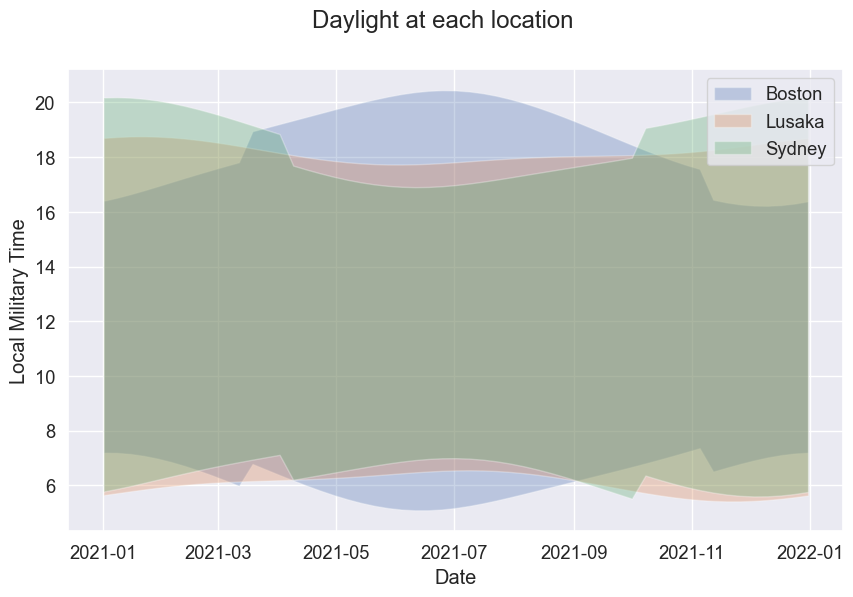

In [23]:
plot_daylight(df_annual_sun)